In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('task.csv')

In [2]:
df = pd.DataFrame(data)

In [3]:
# create a profit column
df['profit'] = df['EPL'] - df['CPL']

In [4]:
df['conversion_rate'] = df['conversion_rate'].str.replace(',', '.')
df['conversion_rate'] = df['conversion_rate'].str.replace('%', '')

In [5]:
df['conversion_rate'] = df['conversion_rate'].astype(float)

In [6]:
# grouping the data by month and product, and fetching average conversion rate for these two metrics
avg_cr = df.groupby(['month', 'product'])['conversion_rate'].mean().reset_index()

In [7]:
# transforming the data to much clearer pivot table format
cr_pivot = avg_cr.pivot(index='month',columns='product',values='conversion_rate')
cr_pivot

product,A,B,C
month,,,
1/1/2015,0.672500,0.742188,0.660484
10/1/2014,0.656958,0.654708,0.743150
11/1/2014,0.758345,1.136468,0.685837
12/1/2014,0.928800,1.748797,0.655332
2/1/2015,0.715047,0.699789,0.692955
3/1/2015,0.648154,0.642415,0.650589
4/1/2015,0.800885,0.759545,0.646731
5/1/2015,0.641954,0.769079,0.565269
8/1/2014,0.617794,0.572391,0.718118


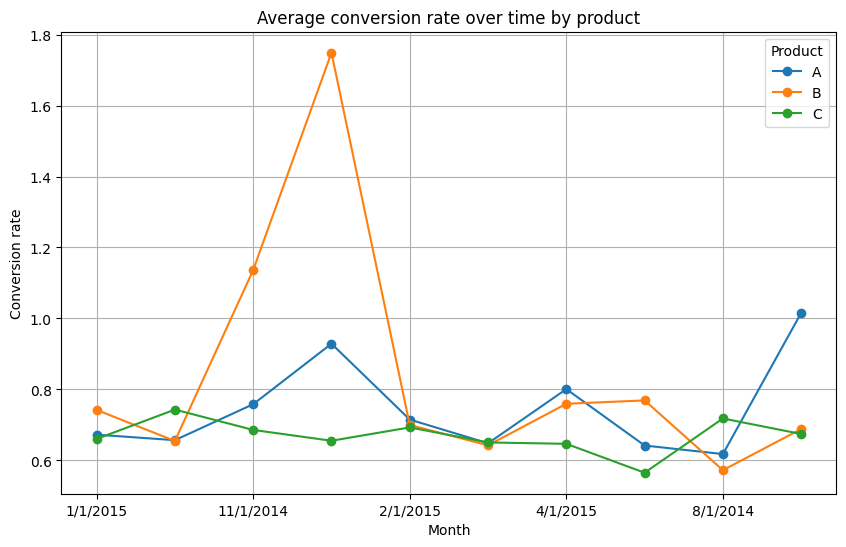

In [8]:
# Creating a time series chart to visualize how average conversion rate changes over time for every product
cr_pivot.plot(figsize=(10,6), marker='o', title='Average conversion rate over time by product')
plt.xlabel('Month')
plt.ylabel('Conversion rate')
plt.grid(True)
plt.legend(title='Product')
plt.show()

### The average conversion rate for product A skyrocketed in November and kept risig up until falling down to regular numbers in January.

In [9]:
# grouping the data by month and product to calculate total profit by month
grouped_data = df.groupby(['month', 'product']).agg({'profit': 'sum'}).reset_index()

In [10]:
# transforming the data to a readable pivot table that will display all core values
pivot = grouped_data.pivot(index='month',columns='product',values='profit')
pivot

product,A,B,C
month,,,
1/1/2015,2316,2524,947
10/1/2014,2512,1119,907
11/1/2014,2419,2069,1415
12/1/2014,2564,1496,962
2/1/2015,2470,1318,882
3/1/2015,2912,1951,890
4/1/2015,2745,1385,968
5/1/2015,3463,-468,1011
8/1/2014,2113,1638,880


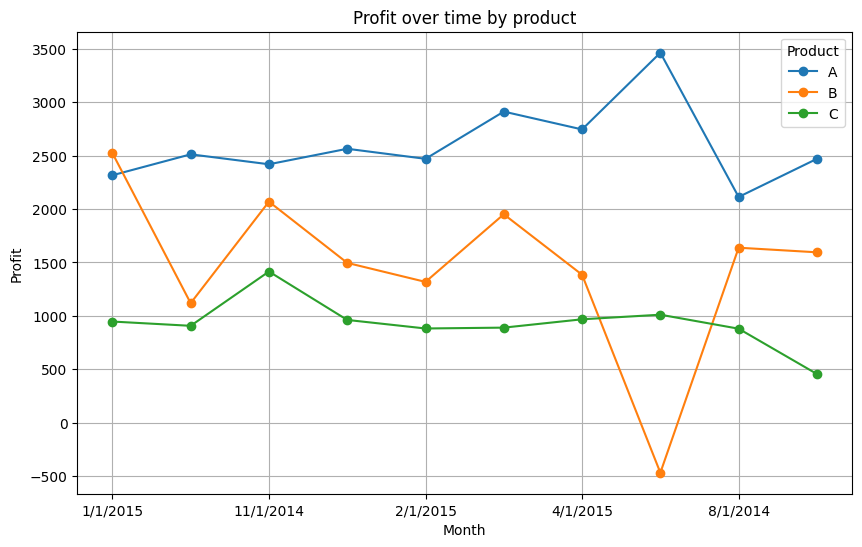

In [11]:
# Creating a time series chart to visualize how profit behaves every month for each product
pivot.plot(figsize=(10,6), marker='o', title='Profit over time by product')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid(True)
plt.legend(title='Product')
plt.show()

### We can clearly see that product A dominates nearly every month except for January 2015 where it has been dethroned by product B by a narrow margin, for only one month.

In [12]:
# Grouping the data by product and calculating total profit for each product in the given timespan
total_profit = df.groupby('product')['profit'].sum().reset_index()

In [13]:
total_profit

,product,profit
0,A,25984
1,B,14627
2,C,9318


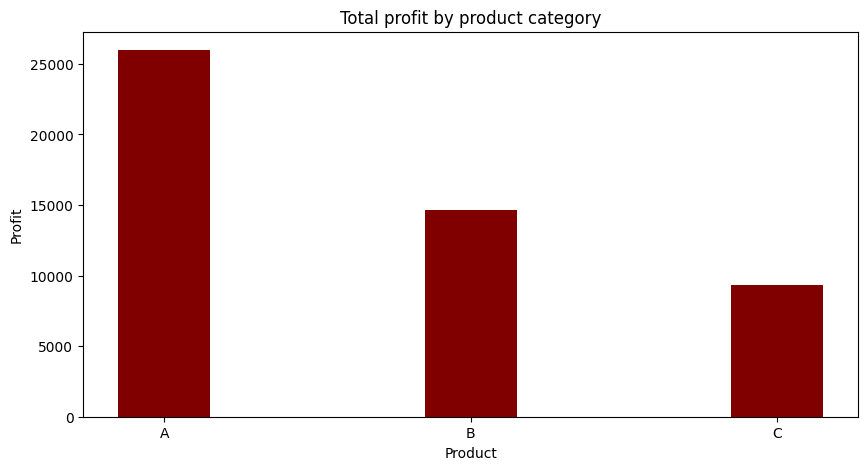

In [14]:
# Creating a simple bar chart which displays the total profit by product category
fig = plt.figure(figsize=(10,5))

plt.bar(total_profit['product'],total_profit['profit'],color='maroon',width=0.3)
plt.xlabel("Product")
plt.ylabel("Profit")
plt.title("Total profit by product category")
plt.show()

### We can clearly see that product A has generated the highest profit for the given timespan

# Now that we identified product A as the most profitable product (it generated the highest total profit, highest profit per day, as well as highest profit per month; also, there was a time of year in 2014 when average conversion rate skyrocketed, becoming a total outlier for two months, so that's also a good sign) we can hang on to it and choose the most suitable campaign type for it